# 지도학습(2) - 회귀분석
- 단순선형 회귀분석으로 `농어의 길이`를 가지고 `무게를 예측`하는 모델 만들기

## 1. 작업 준비
### 패키지 및 데이터 가져오기 및 그래프 전역 설정

In [1]:
import sys
import numpy as np
import seaborn as sb                    # 데이터 시각화를 위한 모듈
from pandas import read_excel           # 엑셀 데이터 가져오기 위한 모듈
from matplotlib import pyplot as plt    # 그래프 그리기 위한 모듈

from sklearn.linear_model import LinearRegression       # 선형 회귀분석하기 위한 모듈
from sklearn.model_selection import train_test_split    # 훈련/검증 데이터 분리하기 위한 모듈

In [3]:
origin = read_excel('https://data.hossam.kr/F02/fish.xlsx')
origin = origin[['길이', '무게']]
origin.head()

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


In [4]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.unicode_minus'] = False

## 1. 데이터 전처리
### 1) 훈련데이터와 검증데이터 분할
- train data / 훈련 데이터: 모델을 생성하는데 사용되는 데이터
- test data / 검증 데이터: 모델이 얼마나 잘 만들어졌는지 확인하는 용도
#### 데이터프레임을 통째로 넣는 경우
- 데이터프레임에 독립변수와 종속변수가 모두 포함되어 있는 형태
- 같은 유형으로 원본 데이터프레임이 7:3으로 분할된 두 개의 데이터프레임이 반환된다
- `새데이터프레임1, 새데이터프레임2 = train_test_split('원본데이터프레임', test_size = n, random_state = 777)`
    - test_size = n 에서 n은 0~1 사이로 분리할 비율을 나타냄
        - test_size = 0.3 일 경우 새데이터프레임1은 7의 비율로, 새데이터프레임2은 3의 비율로 분할됨
    - random_state = 777 을 파라미터로 넣으면 랜덤으로 분할됨?

In [18]:
train, test = train_test_split(origin, test_size = 0.3, random_state = 777)

In [31]:
print(len(train))
train.head()

39


,길이,무게
8,19.6,85.0
0,8.4,5.9
15,22.0,120.0
26,24.6,188.0
51,42.0,1100.0


In [32]:
print(len(test))
test.head()

17


,길이,무게
16,22.0,130.0
12,21.0,125.0
21,22.7,145.0
33,27.5,250.0
36,30.0,320.0


#### 데이터프레임을 독립변수와 종속변수로 분리하여 사용하는 경우
- 독립변수를 7:3으로 분할한 형태와 종속변수를 7:3으로 분할한 형태가 반환된다
- -> 총 4개의 데이터프레임 생성

In [21]:
# 독립변수, 종속변수 분리
x_data = origin[['길이']]
y_data = origin[['무게']]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size = 0.3,
                                                    random_state = 777)

In [30]:
print(len(x_train))
x_train.head()

39


,길이
8,19.6
0,8.4
15,22.0
26,24.6
51,42.0


In [33]:
print(len(x_test))
x_test.head()

17


,길이
16,22.0
12,21.0
21,22.7
33,27.5
36,30.0


In [34]:
print(len(y_train))
y_train.head()

39


,무게
8,85.0
0,5.9
15,120.0
26,188.0
51,1100.0


In [35]:
print(len(y_test))
y_test.head()

17


,무게
16,130.0
12,125.0
21,145.0
33,250.0
36,320.0


## 3. 데이터 분석
### 1) 선형 회귀분석 수행

In [39]:
my_model = LinearRegression()
my_fit = my_model.fit(x_train, y_train)

print('계수: ', my_fit.coef_[0][0])
print('절편: ', my_fit.intercept_[0])
print('훈련 데이터 설명력: ', my_fit.score(x_train, y_train))
print('검증 데이터 설명력: ', my_fit.score(x_test, y_test))

print('회귀식 추정:', 'y = {0:.2f} * x + {1:.2f}'.format(my_fit.coef_[0][0],
                                         my_fit.intercept_[0]))

계수:  37.01288998372031
절편:  -636.2542709819862
훈련 데이터 설명력:  0.9114180355953712
검증 데이터 설명력:  0.933893451951942
회귀식 추정: y = 37.01 * x + -636.25


### 2) 분석 결과 시각화

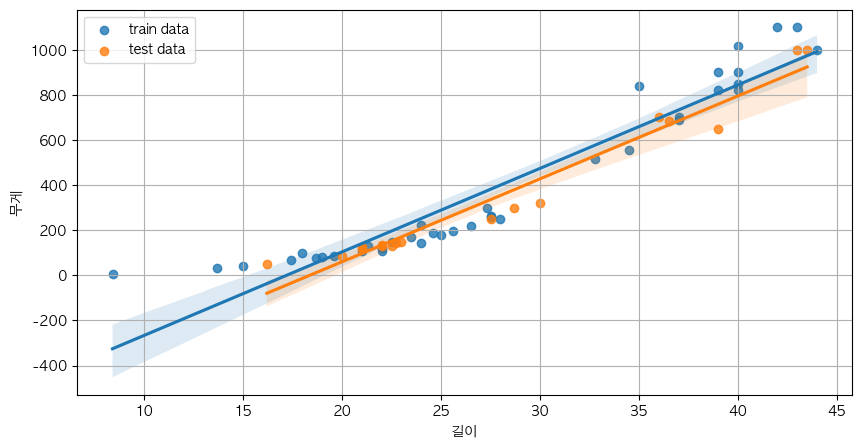

In [41]:
plt.figure(figsize=(10, 5))

# 원본 데이터 전체
# sb.regplot(data = origin, x='길이', y='무게'2_지도학습\(1\)회귀분석.ipynb

# 학습에 사용된 데이터만으로 산점도 그래프 그리기
sb.regplot(x=x_train['길이'], 
          y=y_train['무게'], 
          label = 'train data')
# 검정 데이터만으로 산점도 그래프 그리기
sb.regplot(x=x_test['길이'],
          y=y_test['무게'],
          label = 'test data')

plt.legend()
plt.grid()
plt.show()
plt.close()

> 91%라는 설명력에 비해 추세선으로부터 실제 데이터들이 너무 멀리 떨어져 있다 (= 잔차가 크다)
> 
> 과대적합의 냄새가 난다.

## 4. 과적합
### 1) 과소적합 (underfitting)
-  분석 모델이 너무 단순해서 데이터의 구조를 제대로 학습하지 못할 경우

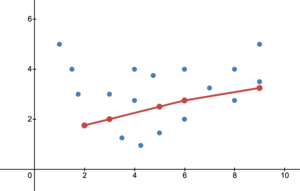

In [42]:
from IPython.display import display, Image
display(Image('image7.png'))

- 모델이 단순하다는 의미는 변수(피처feature)의 수가 부족함을 의미함
#### 해결 방법
- 모델 파라미터가 더 많은 모델을 선택 (단순선형회귀 -> 다항회귀)
- 학습 알고리즘에 더 좋은 특성을 제공
> 결국은 변수를 늘리라는 뜻

### 2) 과대적합 (overfitting?)
- `훈련 데이터`에 있는 `잡음의 양`이 모델에 비해 너무 복잡한 경우
- `설명력에 비해 잔차가 큰 경우`라 할 수 있다

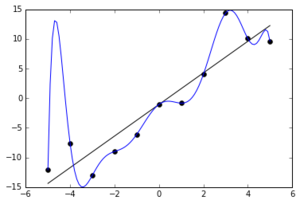

In [43]:
from IPython.display import display, Image
display(Image('image8.png'))

#### 해결 방법
- 파라미터 수가 적은 모델을 선택
- 훈련 데이터의 특성 수를 줄임
- 모델을 단순화 시킴
> 결국은 변수를 줄이라는 뜻
- 훈련 데이터의 잡음을 줄임
> 이상치 제거

## 5. 다항회귀(단일피쳐 다항회귀, 곡선회귀)
- 데이터에 잘 맞는 일차 함수나 직선을 구하는 게 아니라 `다항식`이나 `곡선`을 구해서 학습하는 방법
- 하나의 입력 변수에 대하여 차수를 확장하여 다차원 회귀 모델을 도출한다

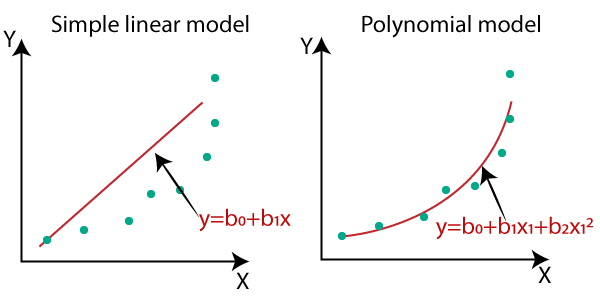

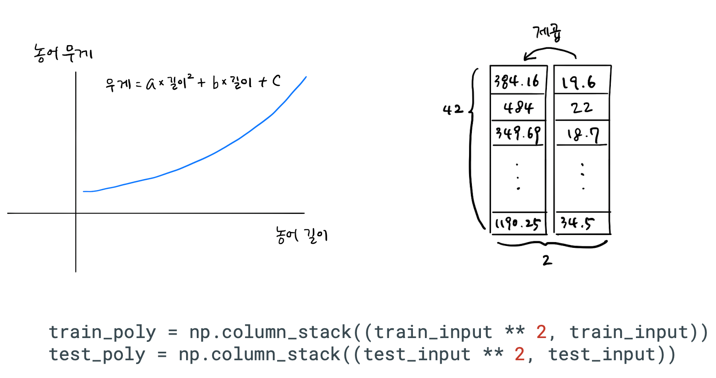

In [47]:
from IPython.display import display, Image
display(Image('image5.png'))
display(Image('image6.png'))


### 1) 데이터 전처리 (훈련 데이터와 검증 데이터 분할)
#### 훈련 데이터의 독립변수 추가 

In [60]:
x_train['길이^2'] = x_train['길이'] ** 2
x_train.head()

,길이,길이^2
8,19.6,384.16
0,8.4,70.56
15,22.0,484.00
26,24.6,605.16
51,42.0,1764.00


#### 검증 데이터의 독립변수 추가

In [59]:
x_test['길이^2'] = x_test['길이'] ** 2
x_test.head()

,길이,길이^2
16,22.0,484.00
12,21.0,441.00
21,22.7,515.29
33,27.5,756.25
36,30.0,900.00


### 2) 분석

In [63]:
my_model = LinearRegression()
my_fit = my_model.fit(x_train, y_train)

print('계수: ', my_fit.coef_)
print('절편: ', my_fit.intercept_)
print('훈련 데이터 설명력: ', my_fit.score(x_train, y_train))
print('검증 데이터 설명력: ', my_fit.score(x_test, y_test))

print('회귀식 추정:', 'y = {0:.2f} * x + {1:.2f}'.format(my_fit.coef_[0][0], my_fit.intercept_[0]))

계수:  [[-23.92139238   1.06707967]]
절편:  [143.06821268]
훈련 데이터 설명력:  0.9741164053383603
검증 데이터 설명력:  0.9608757319315258
회귀식 추정: y = -23.92 * x + 143.07



### 3) 분석 결과 시각화

7.0 46.0


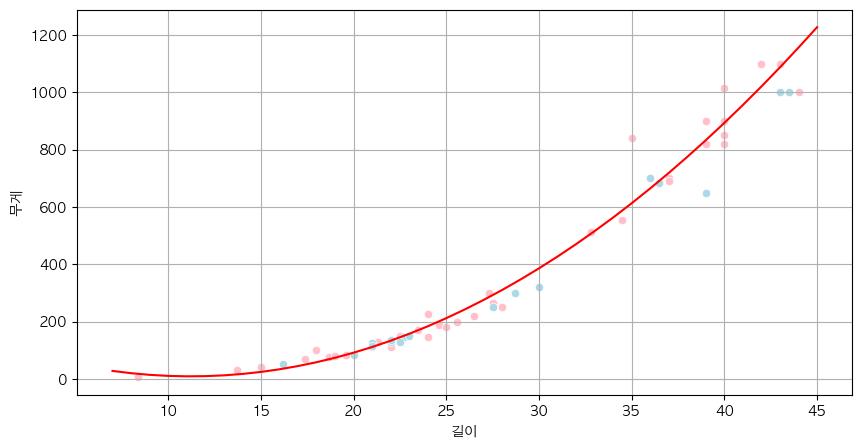

In [73]:
plt.figure(figsize = (10, 5))
sb.scatterplot(x=x_train['길이'], y=y_train['무게'], color='pink')

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표 생성
xmin, xmax = plt.xlim()
print(xmin.round(), xmax.round())
xrange = np.arange(xmin.round(), xmax.round(), 1)
# print(xrange)

# y값에 대한 추정치를 계산
y_pred = xrange * my_fit.coef_[0][0] + xrange**2 * my_fit.coef_[0][1] + my_fit.intercept_[0]
# print(y_pred)

sb.scatterplot(x=x_test['길이'], y=y_test['무게'], color='lightblue')
sb.lineplot(x=xrange, y=y_pred, color='red')

plt.grid()
plt.show()
plt.close()
